<a href="https://colab.research.google.com/github/mattfarrow1/7331-machine-learning-1/blob/main/Labs/Lab1_Group4_mb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab One: Visualization and Data Preprocessing

Matt Farrow, Amber Clark, Blake Freeman, Megan Ball

## **2015 Flight Delays and Cancellations**
Data Source: [Kaggle](https://www.kaggle.com/usdot/flight-delays?select=flights.csv)

## Business Understanding

`Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.`

The data set that our group selected came the U.S. Department of Transportation's Bureau of Transportation Statistics and "tracks the on-time performance of domestic flights operated by large air carriers" during 2015 ([Kaggle](https://www.kaggle.com/usdot/flight-delays)). The data is broken up into three separate `.csv` files: one with flight details for 5,819,079 flights during 2015, one with 14 different U.S.-based airlines, and one with the geographic details of 322 U.S. airports. 

The data is important because it takes airline delays and cancellations, one of the aspects of airline travel that is popular fodder for public complaints, and quantifies it in a way that offers the possiblity of tangible analysis. 

#### TO DO (MATT)

- Describe the two variables to be measured. Arrival delay (regression & RMSE) & Cancellation (classification & accuracy? precision?)
- Measure effectiveness using 10-fold cross-validation


## Data Meaning Type

`Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.`

### Load the Data

In [27]:
# Load libraries
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [28]:
# Due to the way these columns are formatted, we want to keep the leading zeros during our import. Later on will convert them to a time format.
dtype_t = {'SCHEDULED_DEPARTURE': str,
           'DEPARTURE_TIME': str,
           'WHEELS_OFF': str,
           'SCHEDULED_TIME': str,
           'WHEELS_ON': str,
           'SCHEDULED_ARRIVAL': str,
           'ARRIVAL_TIME': str
          }

# Read in the data directly from GitHub
airlines = pd.read_csv('https://raw.githubusercontent.com/mattfarrow1/7331-machine-learning-1/main/Data/airlines.csv')
airports = pd.read_csv('https://raw.githubusercontent.com/mattfarrow1/7331-machine-learning-1/main/Data/airports.csv')
flights  = pd.read_csv('https://media.githubusercontent.com/media/mattfarrow1/7331-machine-learning-1/main/Data/flights.csv', dtype = dtype_t)

In [29]:
# Look at the airline data
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [30]:
# Look at the airport data
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [31]:
# Look at the flight data
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### TO DO (AMBER)

### Merge Flights & Airlines

The flight data will become our primary data set, but we can join it with the airline information to bring in the human-readable names.

In [32]:
# Rename columns in preparation for merge
airlines.rename(columns={'IATA_CODE': 'AIRLINE_CODE'}, inplace=True)
flights.rename(columns={'AIRLINE': 'AIRLINE_CODE'}, inplace=True)

In [33]:
# Merge data together
df = pd.merge(flights, airlines, on='AIRLINE_CODE', how = 'left')

In [34]:
# Look at the newly merged data
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


Our merged data set contains 5,819,079 observations and 32 attributes.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE_CODE           object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
DEPARTURE_TIME         object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             object
SCHEDULED_TIME         object
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              object
TAXI_IN                float64
SCHEDULED_ARRIVAL      object
ARRIVAL_TIME           object
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DE

### Convert String Columns to Datetime

In [36]:
# Convert string columns to datetime
# Source: https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime
#df.iloc[:, [9, 10, 13, 18, 20, 21]] = df.iloc[:, [9, 10, 13, 18, 20, 21]].apply(pd.to_datetime, format='%H%M', errors = 'coerce')

In [37]:
cols = ["SCHEDULED_DEPARTURE", 
   "DEPARTURE_TIME", 
   "WHEELS_OFF",  
   "WHEELS_ON", 
   "SCHEDULED_ARRIVAL", 
   "ARRIVAL_TIME"]

df[cols] = df[cols].apply(pd.to_datetime, format = '%H%M', errors='coerce')

#df[cols] = df[cols].apply(pd.to_datetime, exact = False, format = '%H%M')
#df[cols] = df[cols].apply(datetime.strptime,format = '%H%M')

In [38]:
df[["SCHEDULED_DEPARTURE", 
   "DEPARTURE_TIME", 
   "WHEELS_OFF", 
   "WHEELS_ON", 
   "SCHEDULED_ARRIVAL", 
   "ARRIVAL_TIME"]].head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,1900-01-01 00:05:00,1900-01-01 23:54:00,1900-01-01 00:15:00,1900-01-01 04:04:00,1900-01-01 04:30:00,1900-01-01 04:08:00
1,1900-01-01 00:10:00,1900-01-01 00:02:00,1900-01-01 00:14:00,1900-01-01 07:37:00,1900-01-01 07:50:00,1900-01-01 07:41:00
2,1900-01-01 00:20:00,1900-01-01 00:18:00,1900-01-01 00:34:00,1900-01-01 08:00:00,1900-01-01 08:06:00,1900-01-01 08:11:00
3,1900-01-01 00:20:00,1900-01-01 00:15:00,1900-01-01 00:30:00,1900-01-01 07:48:00,1900-01-01 08:05:00,1900-01-01 07:56:00
4,1900-01-01 00:25:00,1900-01-01 00:24:00,1900-01-01 00:35:00,1900-01-01 02:54:00,1900-01-01 03:20:00,1900-01-01 02:59:00


### Convert YEAR, MONTH, DAY into a Single Date

In [39]:
# Source: https://stackoverflow.com/questions/54487059/pandas-how-to-create-a-single-date-column-from-columns-containing-year-month
df['FLIGHT_DATE'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(df.YEAR, df.MONTH, df.DAY)])

## Data Quality

`Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.`

### Missing Values

In [40]:
# How many missing values are there in the data?
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE_CODE                 0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86666
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89774
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                94518
TAXI_IN                  92513
SCHEDULED_ARRIVAL            2
ARRIVAL_TIME             94969
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
AIRLINE                      0
FLIGHT_D

There are millions of missing values in the specific delay time columns. This is expected, as not every flight is delayed, and you would hope that percentage would be small of the overall flights. We will convert these missing values into `0` since, in these cases, there was no flight delay for the specific attribute.

In [16]:
# Replace missing values in AIRLINE_DELAY AIR_SYSTEM_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY with '0'
#df[['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = df[['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(value = 0)

Similar to the delay columns, the `CANCELLATION_REASON` column also contains millions of missing values. Here we convert the missing values to `0` and use one hot encoding on the resulting column.

In [41]:
# One hot encode CANCELLATION_REASON where NA = 0
# Source: datagy.io/pandas-get-dummies/

# Convert missing values to 'N' for 'N/A'
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].fillna('N')

# One hot encode
one_hot_columns = ['CANCELLATION_REASON']

for column in one_hot_columns:
  tempdf = pd.get_dummies(df[column], prefix=column)

  df = pd.merge(
      left = df,
      right = tempdf,
      left_index = True,
      right_index = True,
  )

  df = df.drop(columns=column)

df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,FLIGHT_DATE,CANCELLATION_REASON_A,CANCELLATION_REASON_B,CANCELLATION_REASON_C,CANCELLATION_REASON_D,CANCELLATION_REASON_N
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,1900-01-01 00:05:00,...,NaN,NaN,NaN,Alaska Airlines Inc.,2015-01-01,0,0,0,0,1
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,1900-01-01 00:10:00,...,NaN,NaN,NaN,American Airlines Inc.,2015-01-01,0,0,0,0,1
2,2015,1,1,4,US,840,N171US,SFO,CLT,1900-01-01 00:20:00,...,NaN,NaN,NaN,US Airways Inc.,2015-01-01,0,0,0,0,1
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,1900-01-01 00:20:00,...,NaN,NaN,NaN,American Airlines Inc.,2015-01-01,0,0,0,0,1
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,1900-01-01 00:25:00,...,NaN,NaN,NaN,Alaska Airlines Inc.,2015-01-01,0,0,0,0,1


In [42]:
# How many missing values are there in the data now?
df.isnull().sum()

YEAR                           0
MONTH                          0
DAY                            0
DAY_OF_WEEK                    0
AIRLINE_CODE                   0
FLIGHT_NUMBER                  0
TAIL_NUMBER                14721
ORIGIN_AIRPORT                 0
DESTINATION_AIRPORT            0
SCHEDULED_DEPARTURE            0
DEPARTURE_TIME             86666
DEPARTURE_DELAY            86153
TAXI_OUT                   89047
WHEELS_OFF                 89774
SCHEDULED_TIME                 6
ELAPSED_TIME              105071
AIR_TIME                  105071
DISTANCE                       0
WHEELS_ON                  94518
TAXI_IN                    92513
SCHEDULED_ARRIVAL              2
ARRIVAL_TIME               94969
ARRIVAL_DELAY             105071
DIVERTED                       0
CANCELLED                      0
AIR_SYSTEM_DELAY         4755640
SECURITY_DELAY           4755640
AIRLINE_DELAY            4755640
LATE_AIRCRAFT_DELAY      4755640
WEATHER_DELAY            4755640
AIRLINE   

Here the remaining rows containing missing data only account for about 2% of the total number of original observations. We feel comfortable removing those rows with missing values and proceeding with our analysis.

In [19]:
#check counts of cancels
df.groupby('CANCELLED')['YEAR'].count()

CANCELLED
0    5729195
1      89884
Name: YEAR, dtype: int64

In [20]:
# Drop the remaining rows that contain missing values
#df = df.dropna(axis=0)

#this line is a problem - as you can see above it drops all the cancelled flights. will need to fix.

MB comment: I updated from here to change to binary & 0's because it dropped the cancels otherwise.

In [43]:
#update missing values in times to 0. will be updating times to a binary (1 = yes action happened, 0 = no action happened)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].fillna(0)
#change all non-null values to 1
df.loc[(df.DEPARTURE_TIME != '0'), 'DEPARTURE_TIME'] = 1

#change column name to 'DEPARTED'
df.rename(columns={'DEPARTURE_TIME': 'DEPARTED'}, inplace=True)

df.isna().sum()

YEAR                           0
MONTH                          0
DAY                            0
DAY_OF_WEEK                    0
AIRLINE_CODE                   0
FLIGHT_NUMBER                  0
TAIL_NUMBER                14721
ORIGIN_AIRPORT                 0
DESTINATION_AIRPORT            0
SCHEDULED_DEPARTURE            0
DEPARTED                       0
DEPARTURE_DELAY            86153
TAXI_OUT                   89047
WHEELS_OFF                 89774
SCHEDULED_TIME                 6
ELAPSED_TIME              105071
AIR_TIME                  105071
DISTANCE                       0
WHEELS_ON                  94518
TAXI_IN                    92513
SCHEDULED_ARRIVAL              2
ARRIVAL_TIME               94969
ARRIVAL_DELAY             105071
DIVERTED                       0
CANCELLED                      0
AIR_SYSTEM_DELAY         4755640
SECURITY_DELAY           4755640
AIRLINE_DELAY            4755640
LATE_AIRCRAFT_DELAY      4755640
WEATHER_DELAY            4755640
AIRLINE   

In [44]:
#update remaining columns using same logic

cols = ['WHEELS_OFF','WHEELS_ON','ARRIVAL_TIME']
df[cols] = df[cols].fillna(0)

df.loc[(df.WHEELS_OFF != '0'), 'WHEELS_OFF'] = 1
df.loc[(df.WHEELS_ON != '0'), 'WHEELS_ON'] = 1
df.loc[(df.ARRIVAL_TIME != '0'), 'ARRIVAL_TIME'] = 1

df.rename(columns={'ARRIVAL_TIME': 'ARRIVED'}, inplace=True)

df.isna().sum()

YEAR                           0
MONTH                          0
DAY                            0
DAY_OF_WEEK                    0
AIRLINE_CODE                   0
FLIGHT_NUMBER                  0
TAIL_NUMBER                14721
ORIGIN_AIRPORT                 0
DESTINATION_AIRPORT            0
SCHEDULED_DEPARTURE            0
DEPARTED                       0
DEPARTURE_DELAY            86153
TAXI_OUT                   89047
WHEELS_OFF                     0
SCHEDULED_TIME                 6
ELAPSED_TIME              105071
AIR_TIME                  105071
DISTANCE                       0
WHEELS_ON                      0
TAXI_IN                    92513
SCHEDULED_ARRIVAL              2
ARRIVED                        0
ARRIVAL_DELAY             105071
DIVERTED                       0
CANCELLED                      0
AIR_SYSTEM_DELAY         4755640
SECURITY_DELAY           4755640
AIRLINE_DELAY            4755640
LATE_AIRCRAFT_DELAY      4755640
WEATHER_DELAY            4755640
AIRLINE   

In [45]:
#fill missing values with 0
cols = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
df[cols] = df[cols].fillna(0)
df.isna().sum()

YEAR                          0
MONTH                         0
DAY                           0
DAY_OF_WEEK                   0
AIRLINE_CODE                  0
FLIGHT_NUMBER                 0
TAIL_NUMBER               14721
ORIGIN_AIRPORT                0
DESTINATION_AIRPORT           0
SCHEDULED_DEPARTURE           0
DEPARTED                      0
DEPARTURE_DELAY           86153
TAXI_OUT                  89047
WHEELS_OFF                    0
SCHEDULED_TIME                6
ELAPSED_TIME             105071
AIR_TIME                 105071
DISTANCE                      0
WHEELS_ON                     0
TAXI_IN                   92513
SCHEDULED_ARRIVAL             2
ARRIVED                       0
ARRIVAL_DELAY            105071
DIVERTED                      0
CANCELLED                     0
AIR_SYSTEM_DELAY              0
SECURITY_DELAY                0
AIRLINE_DELAY                 0
LATE_AIRCRAFT_DELAY           0
WEATHER_DELAY                 0
AIRLINE                       0
FLIGHT_D

In [46]:
#change remaining null values to 0 if flight was cancelled
df.loc[(df.CANCELLED == 1), ('DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME','AIR_TIME','TAXI_IN','ARRIVAL_DELAY')] = 0
df.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE_CODE                 0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTED                     0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               6
ELAPSED_TIME             15187
AIR_TIME                 15187
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                   2629
SCHEDULED_ARRIVAL            2
ARRIVED                      0
ARRIVAL_DELAY            15187
DIVERTED                     0
CANCELLED                    0
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
AIRLINE                      0
FLIGHT_DATE                  0
CANCELLA

In [47]:
#remove remaining null value
df = df.dropna()

In [48]:
df.isna().sum()

YEAR                     0
MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE_CODE             0
FLIGHT_NUMBER            0
TAIL_NUMBER              0
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
DEPARTED                 0
DEPARTURE_DELAY          0
TAXI_OUT                 0
WHEELS_OFF               0
SCHEDULED_TIME           0
ELAPSED_TIME             0
AIR_TIME                 0
DISTANCE                 0
WHEELS_ON                0
TAXI_IN                  0
SCHEDULED_ARRIVAL        0
ARRIVED                  0
ARRIVAL_DELAY            0
DIVERTED                 0
CANCELLED                0
AIR_SYSTEM_DELAY         0
SECURITY_DELAY           0
AIRLINE_DELAY            0
LATE_AIRCRAFT_DELAY      0
WEATHER_DELAY            0
AIRLINE                  0
FLIGHT_DATE              0
CANCELLATION_REASON_A    0
CANCELLATION_REASON_B    0
CANCELLATION_REASON_C    0
CANCELLATION_REASON_D    0
CANCELLATION_REASON_N    0
d

In [49]:
#save data here for faster upload on section
df.to_csv('../Data/df_clean.csv')

In [50]:
#re-load data
df = pd.read_csv('../Data/df_clean.csv')

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789165 entries, 0 to 5789164
Data columns (total 38 columns):
Unnamed: 0               int64
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE_CODE             object
FLIGHT_NUMBER            int64
TAIL_NUMBER              object
ORIGIN_AIRPORT           object
DESTINATION_AIRPORT      object
SCHEDULED_DEPARTURE      object
DEPARTED                 int64
DEPARTURE_DELAY          float64
TAXI_OUT                 float64
WHEELS_OFF               int64
SCHEDULED_TIME           int64
ELAPSED_TIME             float64
AIR_TIME                 float64
DISTANCE                 int64
WHEELS_ON                int64
TAXI_IN                  float64
SCHEDULED_ARRIVAL        object
ARRIVED                  int64
ARRIVAL_DELAY            float64
DIVERTED                 int64
CANCELLED                int64
AIR_SYSTEM_DELAY         float64
SECURITY_DELAY           float

### Outliers

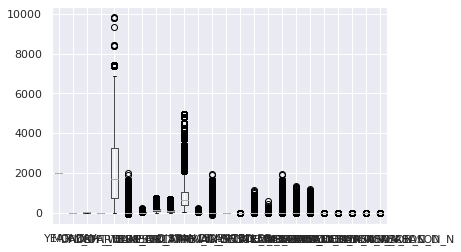

In [91]:
# Check for outliers on continuous variables
# Source: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
num_col = df.select_dtypes(include = np.number).columns.tolist() 
df.boxplot(column = num_col)

Note... need to do some more work here, group at different scales or split out individually

#### TO DO (BLAKE)

- Address outliers
- Amber work on airport codes
- We need to finish cleaning up the time conversions (someone)

## Simple Statistics

`Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.`

In [ ]:
#open data
pd.read_csv('Data/df_clean.csv')

In [25]:
#quick summary of numeric variables
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTED,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,ELAPSED_TIME,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_REASON_A,CANCELLATION_REASON_B,CANCELLATION_REASON_C,CANCELLATION_REASON_D,CANCELLATION_REASON_N
count,5789165.0,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5789165.0,5.789165e+06,5.789165e+06,5789165.0,5.789165e+06,...,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06
mean,2015.0,6.529244e+00,1.570191e+01,3.928717e+00,2.174812e+03,1.0,9.174156e+00,1.585693e+01,1.0,1.352275e+02,...,2.476309e+00,1.398906e-02,3.484605e+00,4.311822e+00,5.355233e-01,3.496359e-03,7.000491e-03,2.481878e-03,3.800203e-06,9.870175e-01
std,0.0,3.403785e+00,8.780918e+00,1.988249e+00,1.758028e+03,0.0,3.666456e+01,9.010045e+00,0.0,7.534131e+01,...,1.308833e+01,9.191515e-01,2.190996e+01,2.062496e+01,8.830108e+00,5.902656e-02,8.337557e-02,4.975659e-02,1.949407e-03,1.131989e-01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,-8.200000e+01,0.000000e+00,1.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.310000e+02,1.0,-5.000000e+00,1.100000e+01,1.0,8.100000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.691000e+03,1.0,-1.000000e+00,1.400000e+01,1.0,1.170000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.234000e+03,1.0,7.000000e+00,1.900000e+01,1.0,1.680000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,1.0,1.988000e+03,2.250000e+02,1.0,7.660000e+02,...,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


As we saw from the outset, the data spans for all months in the year of 2015. Based on the structure of our data, not a lot can be gleaned from the summary statistics and individual variables need additional exploration outside of the overall summary. Let's start by verifying total number of flights within the data set that have been cancelled or diverted.

In [26]:
#check counts of cancels and diversions
df.groupby('CANCELLED')['YEAR'].count()

CANCELLED
0    5714007
1      75158
Name: YEAR, dtype: int64

What does this translate to in terms of percentages?

In [34]:
pct_cancel = round((len(df[df.CANCELLED != 0]))/len(df) * 100,2)

print("The percentage of flights cancelled is ", pct_cancel, "%")

The percentage of flights cancelled is  1.3 %


This is a heavily imbalanced data set! We will need to keep this in mind for our test and train split and over or undersample accordingly. Overall, out of 5 million+ flights, only 1.3% were cancelled in 2015. This equates to 75,158 flights out of 5,714,007.

In [30]:
df.groupby('DIVERTED')['YEAR'].count()

DIVERTED
0    5789165
Name: YEAR, dtype: int64

Our imputation and subsequent removal of missing values has now eliminated all of the diverted flights. This is acceptable as our main interest is in cancellations and arrival delays and not necessarily counts of diversion.


Now let us determine counts of cancels by cancellation reason.

In [47]:
#make subset of just cancelled flights
cancel = df[df.CANCELLED != 0]

pct_A = round((len(cancel[cancel.CANCELLATION_REASON_A != 0]))/len(cancel) * 100,1)
pct_B = round((len(cancel[cancel.CANCELLATION_REASON_B != 0]))/len(cancel) * 100,1)
pct_C = round((len(cancel[cancel.CANCELLATION_REASON_C != 0]))/len(cancel) * 100,1)
pct_D = round((len(cancel[cancel.CANCELLATION_REASON_D != 0]))/len(cancel) * 100,3)

print("The percentage of flights cancelled due to the airline or carrier is ", pct_A, "%")
print("The percentage of flights cancelled due to weather is ", pct_B, "%")
print("The percentage of flights cancelled due to air traffic control is ", pct_C, "%")
print("The percentage of flights cancelled due to security is ", pct_D, "%")

The percentage of flights cancelled due to the airline or carrier is  26.9 %
The percentage of flights cancelled due to weather is  53.9 %
The percentage of flights cancelled due to air traffic control is  19.1 %
The percentage of flights cancelled due to security is  0.029 %


The majority of flight cancellations from this data set are due to weather. There are very few flights that are cancelled because of security reasons.

Next, let's see if there is any useful insights based on what day of the week that flight is scheduled on.

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

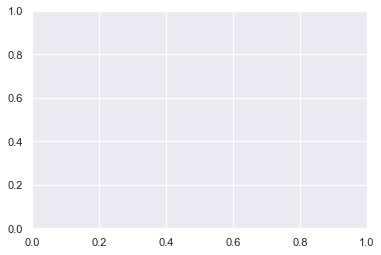

#### TO DO (MEGAN)


## Visualize Attributes

`Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.`

In [66]:
# Flights by day of the week
sns.histplot(df, x = 'DAY_OF_WEEK', binwidth = 1)

AttributeError: module 'seaborn' has no attribute 'histplot'

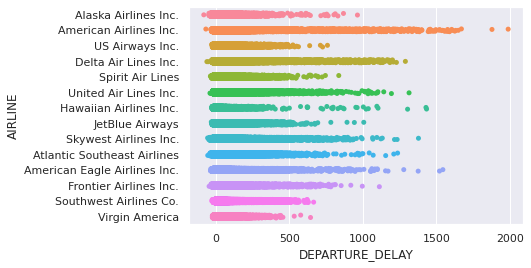

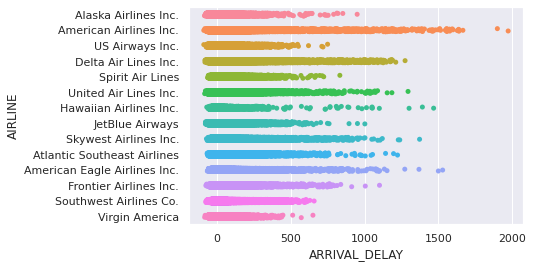

In [98]:
# Delays by airline
sns.stripplot(x='DEPARTURE_DELAY', y='AIRLINE',
              data=df, dodge=True, jitter=True)

plt.show()

sns.stripplot(x='ARRIVAL_DELAY', y='AIRLINE',
              data=df, dodge=True, jitter=True)

plt.show()

American is the clear leader(?) here, but I also imagine they are one of the largest carriers in this list. Do the numbers skew the results here at all?

In [99]:
#most common day of week for flight cancellation


In [100]:
#most common time of day for departure delay

#### TO DO (EVERYONE)

- Create 2+ visualizations per person plus an explanation for each

## Explore Joint Attributes

`Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.`

In [55]:
#re-assess numeric/float variables for corr plot
#df.info()

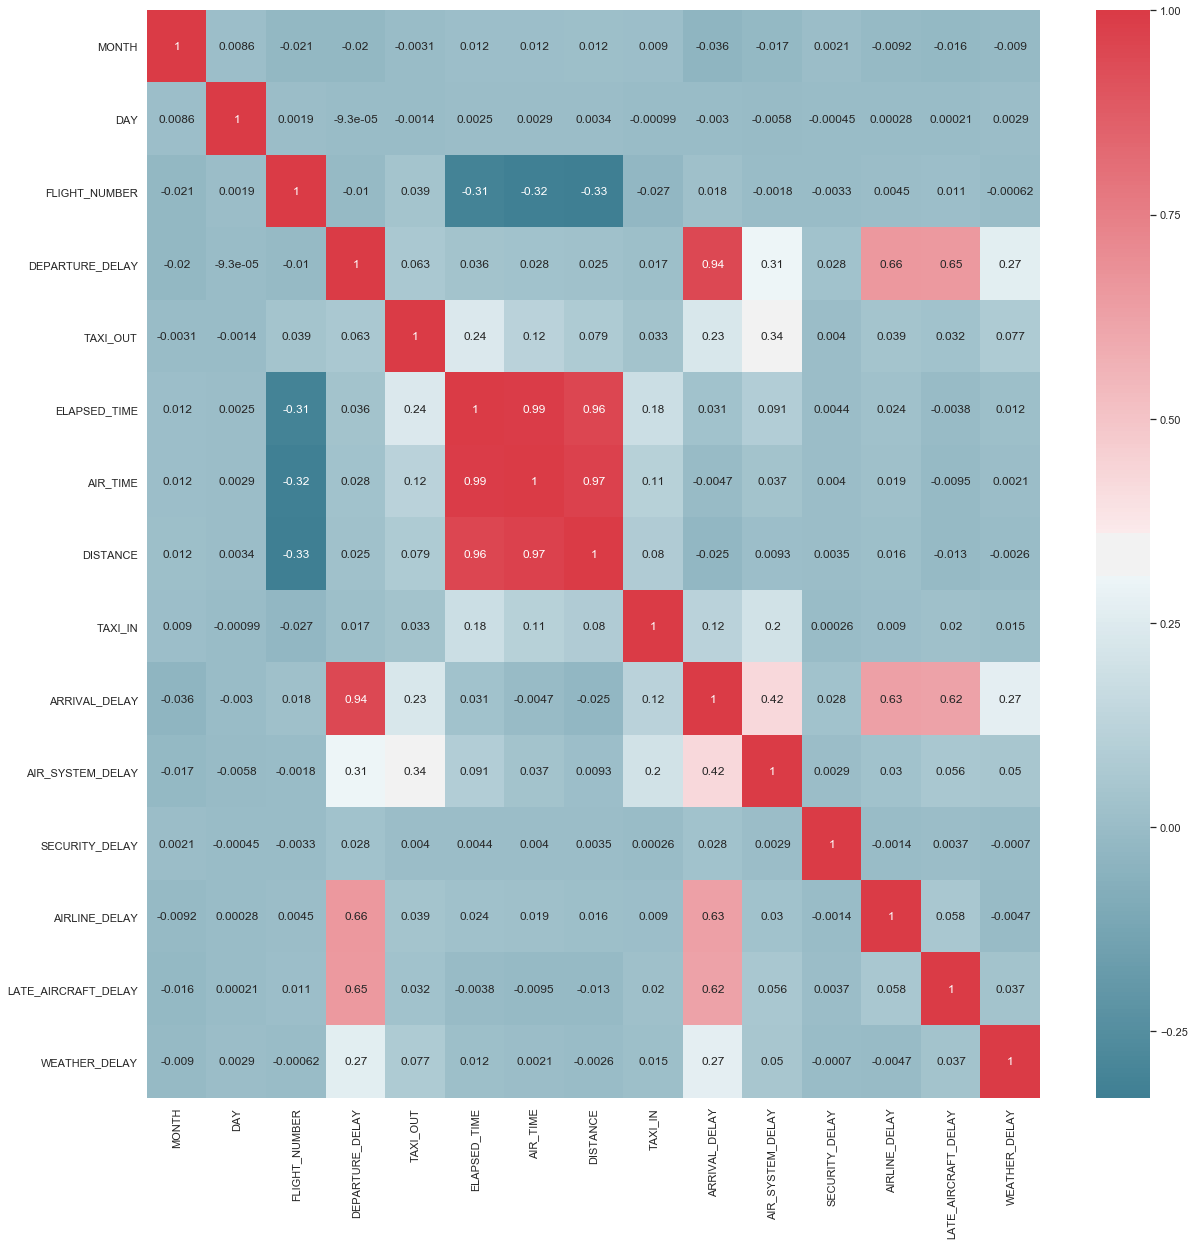

In [54]:
# Examine correlation visually using Seaborn. (Code adapted from 02. Data Visualization.ipynb)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style = "darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize = (20, 20))

#subset for continuous variables only
num = df[['MONTH', 'DAY','FLIGHT_NUMBER',
          'DEPARTURE_DELAY','TAXI_OUT',
          'ELAPSED_TIME','AIR_TIME','DISTANCE',
          'TAXI_IN','ARRIVAL_DELAY','AIR_SYSTEM_DELAY',
          'SECURITY_DELAY','AIRLINE_DELAY',
          'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]

sns.heatmap(num.corr(), cmap=cmap, annot = True)

#### TO DO (MEGAN)

In [ ]:
#plot departure delay vs arrival delay

In [ ]:
#plot bar chart for cancellation reason color coded by year/month/day

## Explore Attributes and Class

`Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).`

#### TO DO (AMBER)

## New Features 

`Are there other features that could be added to the data or created from existing features? Which ones?`

#### TO DO (BLAKE)

## Exceptional Work

`You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results. (aka PCA)`

In [ ]:
# Look at what continuous variables we have to work with
df.select_dtypes(np.number).head()

In [ ]:
# Select columns for PCA
df_pca = df[['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'AIR_TIME', 
            'DISTANCE', 'TAXI_IN', 'ARRIVAL_DELAY', 'DIVERTED', 
            'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
            'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON_A', 
            'CANCELLATION_REASON_B', 'CANCELLATION_REASON_C', 
            'CANCELLATION_REASON_D', 'CANCELLATION_REASON_N']]

In [ ]:
df_pca.shape

In [ ]:
# Source: https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
# Standardize the features
from sklearn.preprocessing import StandardScaler

# Create the object
scaler = StandardScaler()
# Calculate the mean and standard deviation
scaler.fit(df_pca)
df_pca_scaled = scaler.transform(df_pca)

In [ ]:
from sklearn.decomposition import PCA

pca_18 = PCA(n_components=18, random_state=2015)
pca_18.fit(df_pca_scaled)
df_pca_18 = pca_18.transform(df_pca_scaled)

In [ ]:
np.cumsum(pca_18.explained_variance_ratio_*100)

In [ ]:
# Plot PCA results
plt.plot(np.cumsum(pca_18.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [ ]:
print("Variance explained by the first principal component =",
      np.cumsum(pca_18.explained_variance_ratio_*100)[0])
print("Variance explained by the first two principal components =",
      np.cumsum(pca_18.explained_variance_ratio_*100)[1])
print("Variance explained by the first three principal component =",
      np.cumsum(pca_18.explained_variance_ratio_*100)[2])
print("Variance explained by the first six principal components =",
      np.cumsum(pca_18.explained_variance_ratio_*100)[6])
print("Variance explained by the first seven principal components =",
      np.cumsum(pca_18.explained_variance_ratio_*100)[7])

The first six principal components capture 94.17% of the variability in the 18 columns we defined for our PCA data set. Adding a seventh component brings the variability to 99.33%. 

In [ ]:
# PCA 95

pca_95 = PCA(n_components=0.95, random_state=2015)
pca_95.fit(df_pca_scaled)
df_pca_95 = pca_95.transform(df_pca_scaled)

df_pca_95.shape

#### TO DO (MATT)

- PCA on continuous variables
- Map if there is time